##  42028 Assignment 2-Object Detection-YOLOv5
Yuxi Song 99155246

# Step 1: Clone github repository

#### **Connect to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#### **Custom Dataset Setup (We will use Kangaroo dataset)**

#### **Clone the Github Repo (Default location /content/)**

In [ ]:
# By Default Cloned under /content/
!git clone https://github.com/meituan/YOLOv6

Cloning into 'YOLOv6'...
remote: Enumerating objects: 3635, done.
remote: Counting objects: 100% (3635/3635), done.
remote: Compressing objects: 100% (1467/1467), done.
remote: Total 3635 (delta 2175), reused 3447 (delta 2108), pack-reused 0
Receiving objects: 100% (3635/3635), 42.94 MiB | 41.40 MiB/s, done.
Resolving deltas: 100% (2175/2175), done.


Install the required libraries

In [ ]:
%cd /content/YOLOv6
from yolov6.utils import *
# display = utils.notebook_init()  # checks Pytorch and GPU used
!pip install -r requirements.txt

/content/YOLOv6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 94.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


# Step 2: Setup Training Configuration

# Step 3: Setup Dataset paths

In [ ]:
#@title Setup Dataset Configuration (Data.yaml)
number_of_classes = 1
train_data_dir = "/content/gdrive/MyDrive/42028/A3/dataset/train" #@param {type:"string"}
val_data_dir = "/content/gdrive/MyDrive/42028/A3/dataset/valid" #@param {type:"string"}
test_data_dir = "/content/gdrive/MyDrive/42028/A3/dataset/test" #@param {type:"string"}

class_names = ["Empty_Seat"] #@param {type:"raw"}
with open('adata_yaml', 'w+') as file:
    file.write(
        f"""
        train: {train_data_dir}
        val: {val_data_dir}
        test: {test_data_dir}
        nc: {number_of_classes}
        names: {class_names}
        """
    )

In [ ]:
#@title Setup Dataset Configuration (Data.yaml)
number_of_classes = 1
train_data_dir = "/content/gdrive/MyDrive/42028/A3/dataset/train" #@param {type:"string"}
val_data_dir = "/content/gdrive/MyDrive/42028/A3/dataset/test" #@param {type:"string"}


class_names = ["Empty_Seat"] #@param {type:"raw"}
with open('test_yaml', 'w+') as file:
    file.write(
        f"""
        train: {train_data_dir}
        val: {val_data_dir}

        nc: {number_of_classes}
        names: {class_names}
        """
    )

# Step 4: Start Training

**Configuation to try:**

*   **Image Size**: 416
*   **Batch Size**: 32
*   **Epochs**: 50






In [ ]:
!python /content/YOLOv6/tools/train.py --img-size 416 --batch-size 32 --epochs 50 --data-path /content/YOLOv6/adata_yaml --conf-file /content/YOLOv6/configs/yolov6l.py

2023-05-28 10:40:41.405811: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-28 10:40:42.298104: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Using 1 GPU for training... 
training args are: Namespace(data_path='/content/YOLOv6/adata_yaml', conf_file='/content/YOLOv6/configs/yolov6l.py', img_size=416, rect=False, batch_size=32, epochs=50, workers=8, device='0', eval_interval=20, eval_final_only=False, heavy_eval_range=50, check_images=False, check_labels=False, output_dir='./runs/train', name='exp', dist_url='env://', gpu_count=0, local_rank=-1, resume=False, write_trainbatch_tb=False, stop_aug_last_n_epoch=15, save_ckpt_on_last_n_epoch=-1, distill=False, distill_feat=False, quant=False, calib=Fals

In [ ]:
!python /content/YOLOv6/tools/eval.py --weights '/content/YOLOv6/runs/train/exp/weights/best_ckpt.pt' --data /content/YOLOv6/adata_yaml

Namespace(data='/content/YOLOv6/adata_yaml', weights='/content/YOLOv6/runs/train/exp/weights/best_ckpt.pt', batch_size=32, img_size=640, conf_thres=0.03, iou_thres=0.65, task='val', device='0', half=False, save_dir='runs/val/', name='exp', shrink_size=0, infer_on_rect=True, reproduce_640_eval=False, eval_config_file='./configs/experiment/eval_640_repro.py', do_coco_metric=True, do_pr_metric=False, plot_curve=True, plot_confusion_matrix=False, verbose=False, config_file='', specific_shape=False, height=None, width=None)
Loading checkpoint from /content/YOLOv6/runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
Model Summary: Params: 59.54M, Gflops: 150.50
img record infomation path is:/content/gdrive/MyDrive/42028/A3/dataset/.valid_cache.json
Val: Checking formats of labels with 4 process(es): 
258 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 258/258 [00:00<00:00, 540.67it/s]
Convert to COCO format
100% 258/258 [00:0

In [ ]:
!python /content/YOLOv6/tools/eval.py --weights '/content/YOLOv6/runs/train/exp/weights/best_ckpt.pt' --data /content/YOLOv6/test_yaml

Namespace(data='/content/YOLOv6/test_yaml', weights='/content/YOLOv6/runs/train/exp/weights/best_ckpt.pt', batch_size=32, img_size=640, conf_thres=0.03, iou_thres=0.65, task='val', device='0', half=False, save_dir='runs/val/', name='exp', shrink_size=0, infer_on_rect=True, reproduce_640_eval=False, eval_config_file='./configs/experiment/eval_640_repro.py', do_coco_metric=True, do_pr_metric=False, plot_curve=True, plot_confusion_matrix=False, verbose=False, config_file='', specific_shape=False, height=None, width=None)
Loading checkpoint from /content/YOLOv6/runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
Model Summary: Params: 59.54M, Gflops: 150.50
img record infomation path is:/content/gdrive/MyDrive/42028/A3/dataset/.test_cache.json
Val: Checking formats of images with 4 process(es): 
0 image(s) corrupted: 100% 259/259 [00:11<00:00, 22.48it/s]
Val: Checking formats of labels with 4 process(es): 
258 label(s) found, 1 label(s) missing, 0 label(s)

# Step 5: Test the trained model on sample images

In [ ]:
!ls /content/YOLOv6/runs/train/exp

args.yaml					    predictions.json
events.out.tfevents.1685270454.7d166a630070.2218.0  weights


In [ ]:
!python /content/YOLOv6/tools/infer.py --source '/content/gdrive/MyDrive/42028/A3/Copy of empty_2161.jpg' --weights "/content/YOLOv6/runs/train/exp/weights/best_ckpt.pt" --yaml "/content/YOLOv6/data/empty.yaml"
!python /content/YOLOv6/tools/infer.py --source '/content/gdrive/MyDrive/42028/A3/Copy of empty_3058.jpg' --weights "/content/YOLOv6/runs/train/exp/weights/best_ckpt.pt" --yaml "/content/YOLOv6/data/empty.yaml"
!python /content/YOLOv6/tools/infer.py --source '/content/gdrive/MyDrive/42028/A3/Copy of empty_4194.jpg' --weights "/content/YOLOv6/runs/train/exp/weights/best_ckpt.pt" --yaml "/content/YOLOv6/data/empty.yaml"

Namespace(weights='/content/YOLOv6/runs/train/exp/weights/best_ckpt.pt', source='/content/gdrive/MyDrive/42028/A3/Copy of empty_2161.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/data/empty.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from /content/YOLOv6/runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00,  5.21it/s]
Results saved to runs/inference/exp
Namespace(weights='/content/YOLOv6/runs/train/exp/weights/best_ckpt.pt', source='/content/gdrive/MyDrive/42028/A3/Copy of empty_3058.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/data/empty.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt

# Step 6: Display result images

In [ ]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image

# This is needed to display the images.
%matplotlib inline

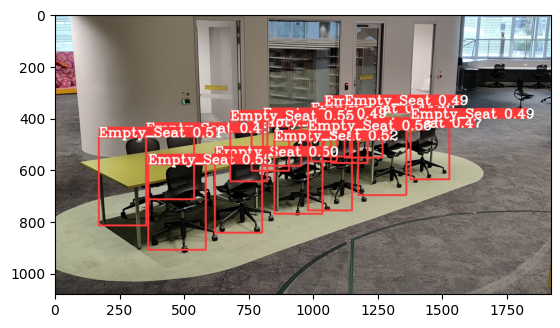

In [ ]:
image = Image.open('/content/YOLOv6/runs/inference/exp/Copy of empty_2161.jpg')
plt.imshow(image)

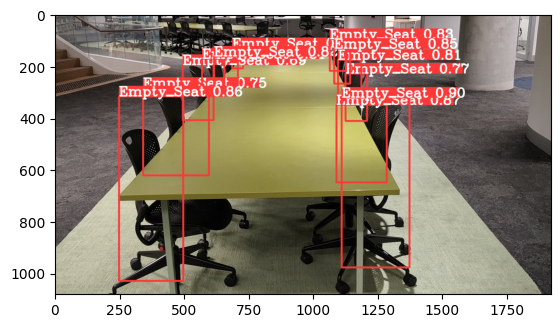

In [ ]:
image = Image.open('/content/YOLOv6/runs/inference/exp/Copy of empty_3058.jpg')
plt.imshow(image)

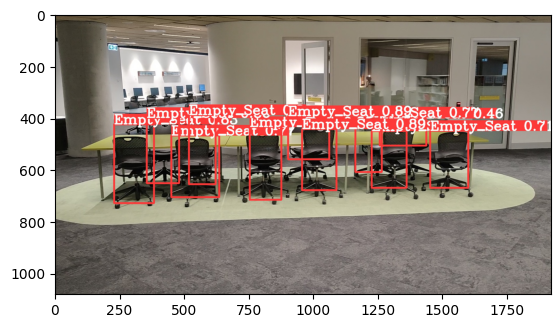

In [ ]:
image = Image.open('/content/YOLOv6/runs/inference/exp/Copy of empty_4194.jpg')
plt.imshow(image)